# DESAFÍO 1 - Análisis exploratorio de un dataset de precios de propiedades

### Librerías

En la linea siguiente vamos a importar todas las librerías que vamos a utilizar con nuestro DataFrame.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importamos el DataFrame

Vamos a importar el DataFrame, identificando que tipo de columnas tenemos y ademas el tamaño que tiene.

In [2]:
ruta = "data/properatti.csv"

df_prop = pd.read_csv(ruta)
print(df_prop.dtypes)
print("Tamaña del DataFrame: " + str(df_prop.shape))

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

---
Identificamos que tiene columnas de varios formatos y un tamaño de **(filas: 121220, columnas: 26)**

* **Columnas**

Con la función "head" nos puede resumir la cantidad de filas que queremos observar de manera simplifiacad, sin que nos muestre todos los valores.

In [3]:
df_prop.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


---

### Identificar nulos

Con las sigueintes lineas podremos identificar el porcentaje de nulos en las columnas. Así determinar que tan relevantes serán los datos de las columnas para el estudio necesario. Y de ser necesario imputar valores para el estudio.

In [4]:
df_prop_nulls = df_prop.isnull().sum()
df_prop_per_nulls = (df_prop_nulls / df_prop.shape[0]) * 100
df_prop_per_nulls

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


Text(0.5, 1.0, '% de Valores nulos por columna')

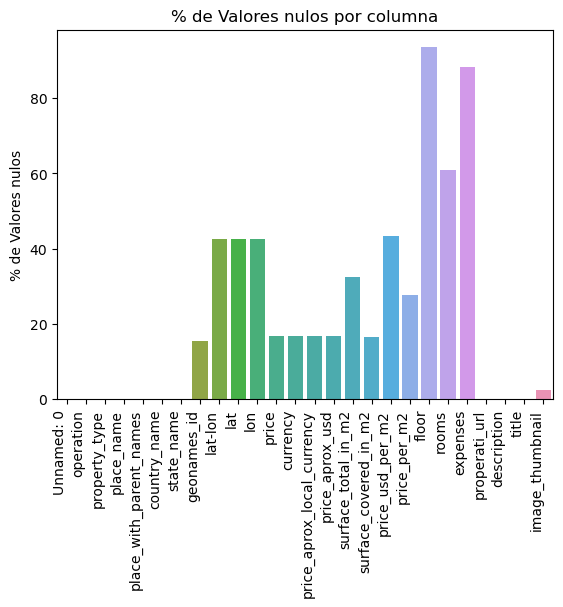

In [5]:
chart_ini = sns.barplot( x=df_prop_per_nulls.index, y=df_prop_per_nulls.values)
chart_ini.set_xticklabels(chart_ini.get_xticklabels(), rotation=90, horizontalalignment='right')
chart_ini.set_ylabel("% de Valores nulos")
chart_ini.set_title("% de Valores nulos por columna")

Se puede observar que las columnas "Floor", "rooms" y "Expenses". Tienen una cantidad de nulos muy elevados y podemos prescindir de ellas. Pero tambien hay otras columnas que tienen datos que no vamos a necesitar para el análisis. Como por ejemplo las imagenes. Por eso vamos a crear un nuevo Data Frame que resuma las columnas de interes.

### Limipiando columnas

Vamos a armar una nueva tabla extrayendo las columnas de mayor interes para el estudio.

In [6]:
df_prop_new = df_prop[["place_name", "lat", "lon", "state_name", "geonames_id", "operation", "property_type", "price_aprox_local_currency", "currency", "price", "price_aprox_usd", "surface_total_in_m2", "surface_covered_in_m2" ,"price_usd_per_m2", "price_per_m2"]]
df_prop_new.head(3)

,place_name,lat,lon,state_name,geonames_id,operation,property_type,price_aprox_local_currency,currency,price,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,Mataderos,-34.661824,-58.508839,Capital Federal,3430787.0,sell,PH,1093959.0,USD,62000.0,62000.0,55.0,40.0,1127.272727,1550.000000
1,La Plata,-34.903883,-57.964330,Bs.As. G.B.A. Zona Sur,3432039.0,sell,apartment,2646675.0,USD,150000.0,150000.0,NaN,NaN,NaN,NaN
2,Mataderos,-34.652262,-58.522982,Capital Federal,3430787.0,sell,apartment,1270404.0,USD,72000.0,72000.0,55.0,55.0,1309.090909,1309.090909


## Identificando valores del DataFrame

A partir de estos datos vemos que las columnas que nos pueden servir para realizar predicciones, son a quellas que identifican:
* La cantidad de metros cuadrados
* Los precios en dolares
* Los precios en Pesos
* Metros cuadrados cubiertos
* Metros cuadrados totales
* Entre otros

Pero vemos que los precios no están todos completos. Para eso deberíamos poder ponderar ese tipo de inmuebles según el tipo y la zona.
Hay valores incompletos y debemos poder identificarlos  y completarlos.

Una vez logrado eso podremos sacar valores promedio de cada zona y tipo de inmueble y remplazar en los valores faltantes de precios.

---

## Imputando valores
### Reemplazar NaN en "place_name"

Queremos poder ponderar con un valor promedio según la zona donde se encuentren los inmuebles, para ello debemos completar los nulos con valores para poder identificar cada valor con una zona y posteriormente promediar los valores en USD y en ARS.

Identificamos cada nullo con una columna que nos aproxime a la zona donde se encuentra.

Vamso a tomar todos aquellos valores nulos de "Place_name" y vamos a tomar la columna de "state_name" con la idea de completar los valores nulos de place_name con la zona donde se encuenntran.

In [7]:
mask = df_prop.place_name.isnull()
df_prop.loc[mask][["place_name", "state_name"]]

,place_name,state_name
6489,NaN,Bs.As. G.B.A. Zona Norte
10201,NaN,Bs.As. G.B.A. Zona Norte
11451,NaN,Bs.As. G.B.A. Zona Norte
14839,NaN,Bs.As. G.B.A. Zona Norte
18622,NaN,Bs.As. G.B.A. Zona Norte
21922,NaN,Bs.As. G.B.A. Zona Norte
23664,NaN,Bs.As. G.B.A. Zona Norte
24722,NaN,Bs.As. G.B.A. Zona Norte
38856,NaN,Bs.As. G.B.A. Zona Norte
45970,NaN,Bs.As. G.B.A. Zona Norte


Podemos determinar que los valores que no están identificados se encuentran solo en la zona norte de GBA. Entonces remplazamos este valor en "place_name" y lo tomamos como una zona.

In [8]:
df_prop.place_name = df_prop.place_name.fillna("Bs.As. G.B.A. Zona Norte") 

**Comprobación**

Comprobamos que que no haya quedado ningún valor nulo.

In [9]:
df_prop.place_name.isnull().sum()

0

In [10]:
mask = df_prop.place_name.isnull()
df_prop.loc[mask][["place_name", "state_name"]]

,place_name,state_name


Podemos ver que no hay coincidiencias y se pudieron completar todos lo elementos NaN.

---

### Imputar los metros cuadrados totales y cubiertos

Ahora identificamos la cantidad de cada tipo de propiedad que hay para poder determinar y ponderar los precios faltantes.

In [11]:
df_prop.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

Veremos cuantos nulos hay en la columna de metros cuadrados.

In [12]:
df_prop.surface_covered_in_m2.isnull().sum()

19907

**Calcular cubierta área promedio por inmueble**

Ahora vamos a crear máscaras para cada tipo de inmueble y calcularemos el valor promedio de metros cuadrados para cada uno.

Vamos hacer una comprobación para ver si contabiliza los nulos en el calculo del valor medio. No queremos que cuente los elementos nulos en el promedio. Para eso haremos una mascara de NO NULOS y calcularemos el valor promedio.

Después vamos hacer el promedio de manera simplificada sin eliminar los nulos.

Si el resultado es el mismo, significa que los valors nulos no los contabiliza como divisor en el método *mean()*.

In [13]:
mask_depto = df_prop.property_type == "apartment"
df_prop_depto = df_prop.surface_covered_in_m2[mask_depto]
mask_depto_notnull = df_prop_depto.notnull()
df_prop_depto.loc[mask_depto_notnull].mean()

74.03917301414582

In [14]:
depto_mean = df_prop_depto.mean()
depto_mean

74.03917301414582

Verificamos que da el mismo promedio
**$$promedio: 74.03917 m^2$$**

Ahora determinaremos el valor promedio para cada uno de los otros inmuebles y reemplazaremos.

In [15]:
print(depto_mean)

74.03917301414582


In [16]:
mask_house = df_prop.property_type == "house"
df_prop_house = df_prop.surface_covered_in_m2[mask_house]
house_mean = df_prop_house.mean()
print(house_mean)

217.8449418084154


In [17]:
mask_ph = df_prop.property_type == "PH"
df_prop_ph = df_prop.surface_covered_in_m2[mask_ph]
ph_mean = df_prop_ph.mean()
print(ph_mean)


87.6594748626094


In [18]:
mask_store = df_prop.property_type == "store"
df_prop_store = df_prop.surface_covered_in_m2[mask_store]
store_mean = df_prop_store.mean()
print(store_mean)

420.3892234548336


---

### Reemplazar valores faltantes de m2

En este caso no es tan directo el reemplazo. Ya que hay que filtrar los valores por cada inmueble y reemplzar su valor pormedio.

Para eso lo que se hizo es crear una variable nueva, filtrar los valores por inmueble y completar los espacios nulos con el valor medio de metros cuadrados de cada uno.

Después se concatenaron respetando el indice y finalmente se reemplazaron todos los valores en la columna de superficie cubierta.

Por último se comprobó que no haya quedado ningún valor nulo.

**Cálculo de valores medios**

In [19]:
df_prop_depto_ = df_prop.surface_covered_in_m2[mask_depto].fillna(value=depto_mean)
df_prop_depto_

1          74.039173
2          55.000000
4          35.000000
7          40.000000
8          60.000000
             ...    
121211    205.000000
121215     93.000000
121217     39.000000
121218     48.000000
121219     77.000000
Name: surface_covered_in_m2, Length: 71065, dtype: float64

In [20]:
df_prop_house_ = df_prop.surface_covered_in_m2[mask_house].fillna(value=house_mean)
df_prop_house_

5         217.844942
9         217.844942
10        217.844942
11        217.844942
15        217.844942
             ...    
121208    178.000000
121210    120.000000
121212    420.000000
121213    600.000000
121216    360.000000
Name: surface_covered_in_m2, Length: 40268, dtype: float64

In [21]:
df_prop_ph_ = df_prop.surface_covered_in_m2[mask_ph].fillna(value=ph_mean)
df_prop_ph_

0          40.000000
3          87.659475
6          78.000000
16         98.000000
34        160.000000
             ...    
120972    206.000000
121081     83.000000
121104    100.000000
121130     12.000000
121148    185.000000
Name: surface_covered_in_m2, Length: 5751, dtype: float64

In [22]:
df_prop_store_ = df_prop.surface_covered_in_m2[mask_store].fillna(value=store_mean)
df_prop_store_

57         30.000000
65        420.389223
95        180.000000
183       420.389223
204       103.000000
             ...    
120854    122.000000
120929    420.389223
121073    169.000000
121125    403.000000
121214    123.000000
Name: surface_covered_in_m2, Length: 4136, dtype: float64

**Concatenación de Series**

Ahora se concatenana los valores de las diferentes series para poder incorporarlo en la nueva columna del DataFrame que estamos utilizando.

In [23]:
depto_hosue = pd.concat([df_prop_depto_, df_prop_house_], axis=0)
depto_house_ph =  pd.concat([depto_hosue, df_prop_ph_], axis=0)
df_prop_all = pd.concat([depto_house_ph, df_prop_store_], axis=0)
df_prop_all

1          74.039173
2          55.000000
4          35.000000
7          40.000000
8          60.000000
             ...    
120854    122.000000
120929    420.389223
121073    169.000000
121125    403.000000
121214    123.000000
Name: surface_covered_in_m2, Length: 121220, dtype: float64

**Incorporación a la columna**

In [24]:
df_prop.surface_covered_in_m2 = df_prop_all

Verificamos que no hayan quedado nulos.

In [25]:
df_prop.surface_covered_in_m2.isnull().sum()

0

Como vemos no hay valores nulos para la columna de superficie cubierta. Eso significa que la imputación fue correcta.

---

**Calcular totales área promedio por inmueble**

Como ya sabemos desde el primer analisis preliminar, hay un porcentaje de valores nulos en la columna de "surface_total_in_m2" y en los valores de "surface_covered_in_m2".

Vamos a realizar los siguientes pasos:
* Determinar la cantidad de valores nulos que tenemos
* Crearemos una mascara para cada tipo de propiedad
* Filtraremos en "surface_total_in_m2"
* Calcularemos la media para cada tipo de inmueble

In [26]:
df_prop.surface_total_in_m2.isnull().sum()

39328

In [27]:
mask_depto = df_prop.property_type == "apartment"
df_prop_depto_tot = df_prop.surface_total_in_m2[mask_depto]
depto_mean_tot = df_prop_depto_tot.mean()
print(f"Depertamentos: {depto_mean_tot}")

mask_house = df_prop.property_type == "house"
df_prop_house_tot = df_prop.surface_total_in_m2[mask_house]
house_mean_tot = df_prop_house_tot.mean()
print(f"Casas: {house_mean_tot}")

mask_ph = df_prop.property_type == "PH"
df_prop_ph_tot = df_prop.surface_total_in_m2[mask_ph]
ph_mean_tot = df_prop_ph_tot.mean()
print(f"PH: {ph_mean_tot}")

mask_store = df_prop.property_type == "store"
df_prop_store_tot = df_prop.surface_total_in_m2[mask_store]
store_mean_tot = df_prop_store_tot.mean()
print(f"Negocios: {store_mean_tot}")

Depertamentos: 96.60587256533229
Casas: 507.43868598245257
PH: 122.29741738405998
Negocios: 494.51240281377267


Vamos a filtrar los nulos de superficie total y solamente veremos las columnas de superficiel total y cubierta para poder ver mejor los resultados.

In [28]:
mask = df_prop.surface_total_in_m2.isnull()
df_prop.loc[mask][["surface_total_in_m2", "surface_covered_in_m2"]]

,surface_total_in_m2,surface_covered_in_m2
1,NaN,74.039173
3,NaN,87.659475
9,NaN,217.844942
11,NaN,217.844942
65,NaN,420.389223
...,...,...
121155,NaN,130.000000
121156,NaN,130.000000
121207,NaN,178.000000
121208,NaN,178.000000


**Cálculo de superficies no cubiertas**

Ahora lo que vamos hacercrear una nueva columna y determinar la cantidad de metros cuadrados que hay en las superficies no cubiertas. Y asi determinar en las casas y los PH el promedio de superficie no-cubierta.

Para eso restaremos superficie total - superficie cubierta a todos los valores de "PH" y "house". Los demás los dejaremos como valores cero.

In [29]:
df_prop["surf_uncoverd_in_m2"] = df_prop.apply(lambda x: 0 if x["surface_total_in_m2"] is np.nan or x["property_type"] == "apartment" or x["property_type"] == "store"  else x["surface_total_in_m2"] - x["surface_covered_in_m2"], axis=1)
df_prop

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,surf_uncoverd_in_m2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,15.0
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,0.0
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.0
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,0.0
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,0.0
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,0.0
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...,0.0


Con esto tenemos una nueva columna de superficie no-cubierta. Pero aún hay valores nulos.

Vamos a contarlos para determinar cuantos de estos valores no tiene un valor real.

In [30]:
df_prop["surf_uncoverd_in_m2"].isnull().sum()

17913

In [31]:
df_prop["surf_uncoverd_in_m2"].mean()

68.45074788512392

In [32]:
df_prop["surface_covered_in_m2"].isnull().sum()

0

In [33]:
df_prop["surface_total_in_m2"].isnull().sum()

39328

---

### Impurat valores de superficie no cubierta

Antes de completar estos valores nulos que hemos determinado en el paso anterior. Vamos a crear un promedio de los valores de superficie cubierta.

Creamos Cuartiles para poder separa los valores en pequeños grupos y sacar promedio de los valores medios de los metros cuadrados de los inmuebles.

Esto lo que nos va a permitir es poder imputar los datos faltantees de las superficies cubiertas y poder después imputarlo en la columna que creamos.

Vamos a realizar lo siguiente:
* Categorizar los tamaños según la superficie en "muy_pequena", "pequena", "mediana", "grande".
* 

In [34]:
q1 = df_prop.surface_covered_in_m2.quantile(.25)
q2 = df_prop.surface_covered_in_m2.quantile(.50)
q3 = df_prop.surface_covered_in_m2.quantile(.75)
q4 = df_prop.surface_covered_in_m2.quantile(1)

bins_df_prop_cov = [0, q1, q2, q3, q4]

df_prop["surface_cat"] = pd.cut(df_prop.surface_covered_in_m2, bins_df_prop_cov, labels=["muy_pequena", "pequena", "mediana", "grande"])
df_prop[["property_type", "surface_covered_in_m2", "surface_cat", "surf_uncoverd_in_m2"]]

,property_type,surface_covered_in_m2,surface_cat,surf_uncoverd_in_m2
0,PH,40.000000,muy_pequena,15.0
1,apartment,74.039173,pequena,0.0
2,apartment,55.000000,pequena,0.0
3,PH,87.659475,mediana,NaN
4,apartment,35.000000,muy_pequena,0.0
...,...,...,...,...
121215,apartment,93.000000,mediana,0.0
121216,house,360.000000,grande,0.0
121217,apartment,39.000000,muy_pequena,0.0
121218,apartment,48.000000,muy_pequena,0.0


In [35]:
df_prop.surface_covered_in_m2.isnull().sum()

0

**Imputar PH y Casas**

Buscamos y filtramos por categoría. Sacamos el promedio de las superficies no cubiertas y remplazamos los nulos. Tanto en "PH" como en "house"

In [36]:
mask_house = df_prop.property_type == "house"
mask_muy_pequena = df_prop.surface_cat == "muy_pequena"
df_prop_house_u_mp = df_prop.surf_uncoverd_in_m2[(mask_house & mask_muy_pequena)]
house_mean_u_mp = df_prop_house_u_mp.mean()
print(house_mean_u_mp)

df_prop_house_u_index = df_prop.surf_uncoverd_in_m2[(mask_house & mask_muy_pequena & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_house_u_index, "surf_uncoverd_in_m2"] = house_mean_u_mp

mask_house = df_prop.property_type == "house"
mask_pequena = df_prop.surface_cat == "pequena"
df_prop_house_u_p = df_prop.surf_uncoverd_in_m2[(mask_house & mask_pequena)]
house_mean_u_p = df_prop_house_u_p.mean()
print(house_mean_u_p)

df_prop_house_u_index = df_prop.surf_uncoverd_in_m2[(mask_house & mask_pequena & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_house_u_index, "surf_uncoverd_in_m2"] = house_mean_u_p

mask_house = df_prop.property_type == "house"
mask_mediana = df_prop.surface_cat == "mediana"
df_prop_house_u_m = df_prop.surf_uncoverd_in_m2[(mask_house & mask_mediana)]
house_mean_u_m = df_prop_house_u_m.mean()
print(house_mean_u_m)

df_prop_house_u_index = df_prop.surf_uncoverd_in_m2[(mask_house & mask_mediana & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_house_u_index, "surf_uncoverd_in_m2"] = house_mean_u_m

mask_house = df_prop.property_type == "house"
mask_grande = df_prop.surface_cat == "grande"
df_prop_house_u_g = df_prop.surf_uncoverd_in_m2[(mask_house & mask_grande)]
house_mean_u_g = df_prop_house_u_g.mean()
print(house_mean_u_g)

df_prop_house_u_index = df_prop.surf_uncoverd_in_m2[(mask_house & mask_grande & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_house_u_index, "surf_uncoverd_in_m2"] = house_mean_u_g

307.49223946784923
171.2620481927711
209.52592137592137
331.40691414468324


In [37]:
mask_ph = df_prop.property_type == "PH"
mask_muy_pequena = df_prop.surface_cat == "muy_pequena"
df_prop_ph_u_mp = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_muy_pequena)]
ph_mean_u_mp = df_prop_ph_u_mp.mean()
print(ph_mean_u_mp)

df_prop_ph_u_index = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_muy_pequena & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_ph_u_index, "surf_uncoverd_in_m2"] = ph_mean_u_mp

mask_ph = df_prop.property_type == "PH"
mask_pequena = df_prop.surface_cat == "pequena"
df_prop_ph_u_p = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_pequena)]
ph_mean_u_p = df_prop_ph_u_p.mean()
print(ph_mean_u_p)

df_prop_ph_u_index = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_pequena & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_ph_u_index, "surf_uncoverd_in_m2"] = ph_mean_u_p

mask_ph = df_prop.property_type == "PH"
mask_mediana = df_prop.surface_cat == "mediana"
df_prop_ph_u_m = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_mediana)]
ph_mean_u_m = df_prop_ph_u_m.mean()
print(ph_mean_u_m)

df_prop_ph_u_index = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_mediana & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_ph_u_index, "surf_uncoverd_in_m2"] = ph_mean_u_m

mask_ph = df_prop.property_type == "PH"
mask_grande = df_prop.surface_cat == "grande"
df_prop_ph_u_g = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_grande)]
ph_mean_u_g = df_prop_ph_u_g.mean()
print(ph_mean_u_g)

df_prop_ph_u_index = df_prop.surf_uncoverd_in_m2[(mask_ph & mask_grande & df_prop.surf_uncoverd_in_m2.isnull())].index
df_prop.loc[df_prop_ph_u_index, "surf_uncoverd_in_m2"] = ph_mean_u_g

13.696236559139784
19.503118503118504
45.62097867515711
34.08583690987125


**Completar Apartamentos y Tiendas**

Para imputar los valores nulos de los apartamentos y las tiendas, vamos hacer lo  mismo, de catergorizar por tamaños y sacar el promedio de cada uno y completar los nulos.

In [38]:
df_prop[["property_type","surface_covered_in_m2", "surf_uncoverd_in_m2", "property_type"]].head(5)

,property_type,surface_covered_in_m2,surf_uncoverd_in_m2,property_type
0,PH,40.000000,15.000000,PH
1,apartment,74.039173,0.000000,apartment
2,apartment,55.000000,0.000000,apartment
3,PH,87.659475,45.620979,PH
4,apartment,35.000000,0.000000,apartment


---

### Calcular la superficie total

Aplicaremos en la columan de superficie total una función con la idea de completar los valores totales y despues poder sacar el  precio por metro cuadrado. 

In [39]:
df_prop["surface_total_in_m2"] = df_prop.apply(lambda x: x["surf_uncoverd_in_m2"] + x["surface_covered_in_m2"], axis=1)
df_prop.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,surf_uncoverd_in_m2,surface_cat
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,15.000000,muy_pequena
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,0.000000,pequena
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.000000,pequena
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,45.620979,mediana
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,0.000000,muy_pequena


Verificamos la cantidad de nulos en la superficie total.

In [40]:
df_prop["surface_total_in_m2"]

0          55.000000
1          74.039173
2          55.000000
3         133.280454
4          35.000000
             ...    
121215     93.000000
121216    360.000000
121217     39.000000
121218     48.000000
121219     77.000000
Name: surface_total_in_m2, Length: 121220, dtype: float64

Veremos cuales son los inmuebles que tiene valores muy bajos de metros cuadrados y corregiremos con un valor aceptable.

In [41]:
mask = df_prop["surface_covered_in_m2"] < 20
df_prop[mask][["surface_covered_in_m2"]].count()

surface_covered_in_m2    607
dtype: int64

Tomamos el valor mas pequeño de los metros cuadrados y completamos aquellos que son menores que este por este valor. (25.8)

In [42]:
df_prop.loc[mask, "surface_covered_in_m2"] = 25.8

**Corroboramos**

In [43]:
mask = df_prop["surface_covered_in_m2"] < 20
df_prop[mask][["surface_covered_in_m2"]].count()

surface_covered_in_m2    0
dtype: int64

---

## Valorización según la zona

Ahora vamos a imputar aquellos valores NaN de los precios de los inmuebles. para eso identificaremos las zonas y crearemos mascaras en un bucle FOR con el objetivo de promediar el valor en la zona y completar los nulos con el valor promedio de la zona y el tipo de inmueble.

### Unificar moneda en USD

Antes que nada se debe unificar la moneda en dolares para tener un panorama más concreto y sin devaluación.

In [44]:
df_prop.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Se identifican una gran cantidad de inmuebles con valores expresados en peso. Y tenemos que identificar el valor del peso en el momento de la cotización.

In [45]:
df_prop.currency.isnull().sum()

20411

In [46]:
mask_curr_null = df_prop.currency.isnull()

In [47]:
df_prop_curr = df_prop[[ 'currency', 'price_aprox_usd', 'price_per_m2', 'price_usd_per_m2', 'price', 'price_aprox_local_currency', 'place_name', 'property_type']][mask_curr_null]
df_prop_curr

,currency,price_aprox_usd,price_per_m2,price_usd_per_m2,price,price_aprox_local_currency,place_name,property_type
5,NaN,NaN,NaN,NaN,NaN,NaN,Gualeguaychú,house
20,NaN,NaN,NaN,NaN,NaN,NaN,Villa Giardino,house
41,NaN,NaN,NaN,NaN,NaN,NaN,Villa Carlos Paz,apartment
62,NaN,NaN,NaN,NaN,NaN,NaN,Berazategui,house
67,NaN,NaN,NaN,NaN,NaN,NaN,Ituzaingó,house
...,...,...,...,...,...,...,...,...
121210,NaN,NaN,NaN,NaN,NaN,NaN,Martínez,house
121211,NaN,NaN,NaN,NaN,NaN,NaN,Acassuso,apartment
121212,NaN,NaN,NaN,NaN,NaN,NaN,Acassuso,house
121213,NaN,NaN,NaN,NaN,NaN,NaN,Martínez,house


Hay una gran cantidad de datos con valores de precios faltantes. Para eso lo que vamos hacer es calcular el valor del metro cuadrado por tipo de propiedad y por lugar.

In [48]:
mask_curr_notnull = df_prop.currency.notnull()

In [49]:
df_prop_curr = df_prop[[ 'surface_covered_in_m2','currency', 'price_aprox_usd', 'price_per_m2', 'price_usd_per_m2', 'price', 'price_aprox_local_currency', 'place_name', 'property_type']][mask_curr_notnull]
df_prop_curr

,surface_covered_in_m2,currency,price_aprox_usd,price_per_m2,price_usd_per_m2,price,price_aprox_local_currency,place_name,property_type
0,40.000000,USD,62000.0,1550.000000,1127.272727,62000.0,1093959.00,Mataderos,PH
1,74.039173,USD,150000.0,NaN,NaN,150000.0,2646675.00,La Plata,apartment
2,55.000000,USD,72000.0,1309.090909,1309.090909,72000.0,1270404.00,Mataderos,apartment
3,87.659475,USD,95000.0,NaN,NaN,95000.0,1676227.50,Liniers,PH
4,35.000000,USD,64000.0,1828.571429,1828.571429,64000.0,1129248.00,Centro,apartment
...,...,...,...,...,...,...,...,...,...
121215,93.000000,USD,870000.0,9354.838710,7699.115044,870000.0,15350715.00,Belgrano,apartment
121216,360.000000,USD,498000.0,1383.333333,1383.333333,498000.0,8786961.00,Beccar,house
121217,39.000000,USD,131500.0,3371.794872,2858.695652,131500.0,2320251.75,Villa Urquiza,apartment
121218,48.000000,USD,95900.0,1997.916667,1997.916667,95900.0,1692107.55,Plaza Colón,apartment


---

**Calculamos el  precio en USD por metro cuadrado**

In [50]:
df_prop["price_usd_per_m2"] = df_prop_curr.apply(lambda x: x if x["price_aprox_usd"] is np.nan  else x["price_aprox_usd"] / x["surface_covered_in_m2"], axis=1)
df_prop[["price_usd_per_m2"]]

,price_usd_per_m2
0,1550.000000
1,2025.954557
2,1309.090909
3,1083.739096
4,1828.571429
...,...
121215,9354.838710
121216,1383.333333
121217,3371.794872
121218,1997.916667


Ahora contaremosla cantidad de nulos que hay en esta columna. Y debe haber la misma cantidad de nulos que hay en el Dataframe con la máscara de precios nulos.

In [51]:
df_prop.price_usd_per_m2.isnull().sum()

20411

Verifica lo esprado: 20411 valores nulos.

**Imputación de precios faltantes**

Con la siguente función pretendemos realizar una imputación de los precios generando un valor medio de precios del metro cuadrado en USD por localidad y por tipo de propiedad.

In [52]:
count = 0
for l  in df_prop['state_name'].value_counts().index:
    for t  in df_prop['property_type'].value_counts().index:
        mask_place = df_prop['state_name'] == l
        mask_type = df_prop['property_type'] == t
        mean = df_prop['price_usd_per_m2'][(mask_place & mask_type)].mean()
        #print(mean)
        count += 1
        if mean is np.nan:
            pass
        else:
            df_prop.loc[df_prop['price_usd_per_m2'][(mask_place & mask_type & df_prop.price_usd_per_m2.isnull())].index, 'price_usd_per_m2'] = mean

print(count)
df_prop.head(5)

112


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,surf_uncoverd_in_m2,surface_cat
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,15.000000,muy_pequena
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,0.000000,pequena
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,0.000000,pequena
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,45.620979,mediana
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,0.000000,muy_pequena


In [53]:
df_prop.price_usd_per_m2.isnull().sum()

27

In [54]:
df_prop.place_name.value_counts()

Córdoba           9254
Rosario           8504
Mar del Plata     6534
Tigre             3324
Nordelta          3315
                  ... 
Alejandro Roca       1
Materno              1
La Silleta           1
Saint Matthews       1
Güer Aike            1
Name: place_name, Length: 1060, dtype: int64

Verificamos la cantidad de elemenstos que quedaron sin colocarle un precio promedio por metro  cuadrado.

In [55]:
df_prop[['price_aprox_usd', 'price_aprox_usd', 'price_per_m2', 'price', 'currency', 'price_aprox_local_currency', 'place_name', 'state_name', 'property_type', 'surface_covered_in_m2', 'price_usd_per_m2']]


,price_aprox_usd,price_aprox_usd,price_per_m2,price,currency,price_aprox_local_currency,place_name,state_name,property_type,surface_covered_in_m2,price_usd_per_m2
0,62000.0,62000.0,1550.000000,62000.0,USD,1093959.00,Mataderos,Capital Federal,PH,40.000000,1550.000000
1,150000.0,150000.0,NaN,150000.0,USD,2646675.00,La Plata,Bs.As. G.B.A. Zona Sur,apartment,74.039173,2025.954557
2,72000.0,72000.0,1309.090909,72000.0,USD,1270404.00,Mataderos,Capital Federal,apartment,55.000000,1309.090909
3,95000.0,95000.0,NaN,95000.0,USD,1676227.50,Liniers,Capital Federal,PH,87.659475,1083.739096
4,64000.0,64000.0,1828.571429,64000.0,USD,1129248.00,Centro,Buenos Aires Costa Atlántica,apartment,35.000000,1828.571429
...,...,...,...,...,...,...,...,...,...,...,...
121215,870000.0,870000.0,9354.838710,870000.0,USD,15350715.00,Belgrano,Capital Federal,apartment,93.000000,9354.838710
121216,498000.0,498000.0,1383.333333,498000.0,USD,8786961.00,Beccar,Bs.As. G.B.A. Zona Norte,house,360.000000,1383.333333
121217,131500.0,131500.0,3371.794872,131500.0,USD,2320251.75,Villa Urquiza,Capital Federal,apartment,39.000000,3371.794872
121218,95900.0,95900.0,1997.916667,95900.0,USD,1692107.55,Plaza Colón,Buenos Aires Costa Atlántica,apartment,48.000000,1997.916667


Son 471 elementos que no tienen ningún precio y vamos a eliminar por que la cantidad es des preciable, por que no hay valores de referencia para ninguno de estos.

In [56]:
df_prop[['surface_covered_in_m2']][df_prop['price_usd_per_m2'].isnull()]

,surface_covered_in_m2
776,134.000000
20990,87.659475
31605,47.000000
35843,420.389223
36169,87.659475
39840,45.000000
40981,87.659475
53598,74.039173
56198,309.000000
63189,87.659475


---

**Eliminacion de valores que no sirven**

In [57]:
df_prop = df_prop.dropna(subset=['price_aprox_usd'])

In [58]:
df_prop['price_aprox_usd'].isnull().sum()


0

In [59]:
df_prop[['property_type', 'price_aprox_usd', 'price', 'place_name', 'state_name']]

,property_type,price_aprox_usd,price,place_name,state_name
0,PH,62000.0,62000.0,Mataderos,Capital Federal
1,apartment,150000.0,150000.0,La Plata,Bs.As. G.B.A. Zona Sur
2,apartment,72000.0,72000.0,Mataderos,Capital Federal
3,PH,95000.0,95000.0,Liniers,Capital Federal
4,apartment,64000.0,64000.0,Centro,Buenos Aires Costa Atlántica
...,...,...,...,...,...
121215,apartment,870000.0,870000.0,Belgrano,Capital Federal
121216,house,498000.0,498000.0,Beccar,Bs.As. G.B.A. Zona Norte
121217,apartment,131500.0,131500.0,Villa Urquiza,Capital Federal
121218,apartment,95900.0,95900.0,Plaza Colón,Buenos Aires Costa Atlántica


Ahora vamos a ver cuantos nulos quedaron en la columna de precios.

In [60]:
df_prop["price"].isnull().sum()

0

(0.0, 50000.0)

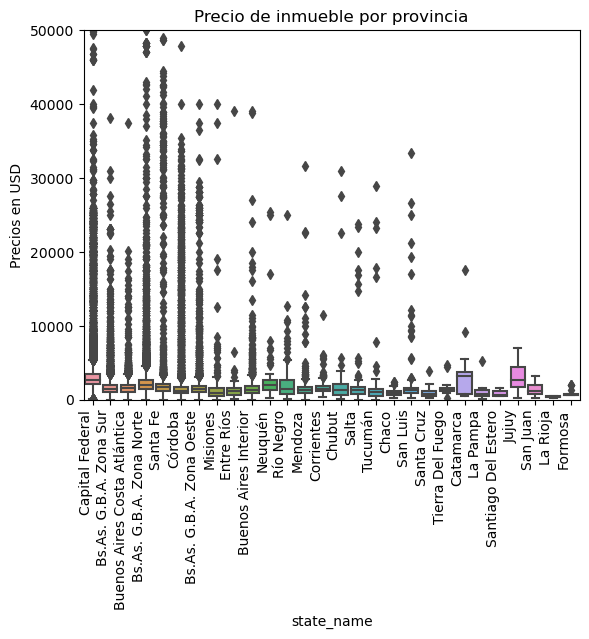

In [61]:
plot_box = sns.boxplot(data=df_prop, x="state_name", y="price_usd_per_m2")
plot_box.set_xticklabels(plot_box.get_xticklabels(), rotation=90, horizontalalignment='right')
plot_box.set_ylabel("Precios en USD")
plot_box.set_title("Precio de inmueble por provincia")
plot_box.set_ylim(0,50000)

## 

In [62]:
df_prop_palermo = df_prop[df_prop.place_name == "La Plata"]

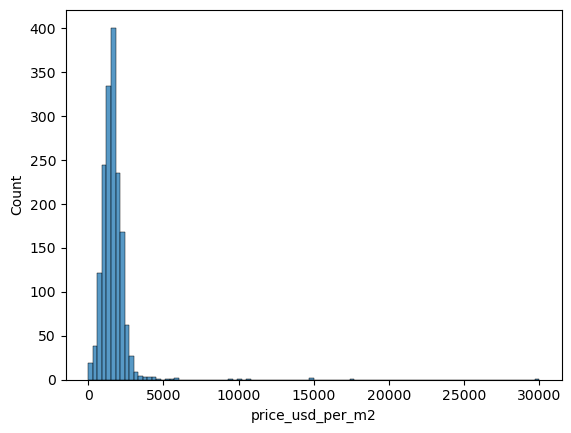

In [63]:
df_prop_palermo = sns.histplot(df_prop_palermo, x="price_usd_per_m2", bins=100)


In [64]:
df_prop_null_new = df_prop.isnull().sum()
df_prop_per_nulls_new = (df_prop_null_new / df_prop.shape[0]) * 100
df_prop_per_nulls_new

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.000000
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   16.815792
lat-lon                       41.922428
lat                           41.922428
lon                           41.922428
price                          0.000000
currency                       0.000992
price_aprox_local_currency     0.000000
price_aprox_usd                0.000000
surface_total_in_m2            0.000000
surface_covered_in_m2          0.000000
price_usd_per_m2               0.000000
price_per_m2                  13.046325
floor                         93.139569
rooms                         60.739014
expenses                      86.860431
properati_url                  0.000000
description                    0.001984
title                          0.000000


---

## Comparación del estado inicial y final del DATAFRAME

Finalmente grraficaremos comparatuvamente el estado final del dataframe para entender el resultado final de los valores.

Primero identificaremos la cantidad de nulos que tiene cada uno y combinaremos las series un solo dataframe para realizar un grafico comparativo.

In [65]:
df_prop_per_nulls_new = pd.DataFrame(df_prop_per_nulls_new)
df_prop_per_nulls_new.rename(columns = {0:"percent"}, inplace=True)
df_prop_per_nulls_new["tipo"] = "limpio"
df_prop_per_nulls_new

,percent,tipo
Unnamed: 0,0.000000,limpio
operation,0.000000,limpio
property_type,0.000000,limpio
place_name,0.000000,limpio
place_with_parent_names,0.000000,limpio
country_name,0.000000,limpio
state_name,0.000000,limpio
geonames_id,16.815792,limpio
lat-lon,41.922428,limpio
lat,41.922428,limpio


In [66]:
df_prop_per_nulls = pd.DataFrame(df_prop_per_nulls)
df_prop_per_nulls.rename(columns = {0:"percent"}, inplace=True)
df_prop_per_nulls["tipo"] = "original"
df_prop_per_nulls

,percent,tipo
Unnamed: 0,0.000000,original
operation,0.000000,original
property_type,0.000000,original
place_name,0.018974,original
place_with_parent_names,0.000000,original
country_name,0.000000,original
state_name,0.000000,original
geonames_id,15.440521,original
lat-lon,42.525986,original
lat,42.525986,original


In [67]:
df_prop_nulls_chart = pd.concat([df_prop_per_nulls_new, df_prop_per_nulls], axis=0)
df_prop_nulls_chart

,percent,tipo
Unnamed: 0,0.000000,limpio
operation,0.000000,limpio
property_type,0.000000,limpio
place_name,0.000000,limpio
place_with_parent_names,0.000000,limpio
country_name,0.000000,limpio
state_name,0.000000,limpio
geonames_id,16.815792,limpio
lat-lon,41.922428,limpio
lat,41.922428,limpio


Text(0.5, 1.0, '% de Valores nulos por columna')

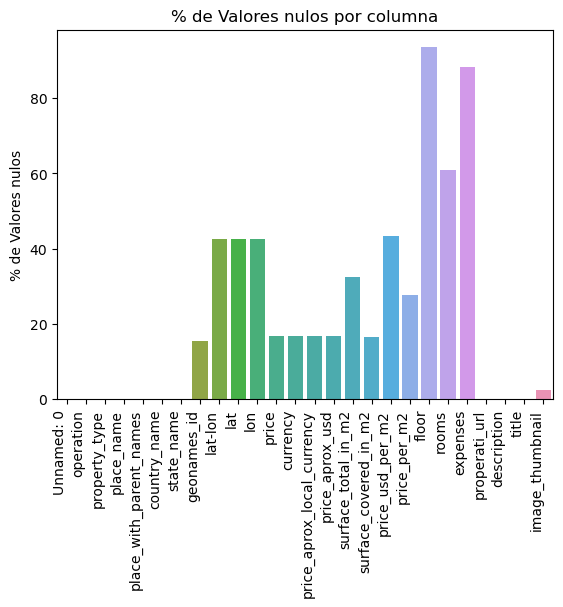

In [68]:
chart_ini = sns.barplot(data=df_prop_per_nulls, x=df_prop_per_nulls.index, y="percent")
chart_ini.set_xticklabels(chart_ini.get_xticklabels(), rotation=90, horizontalalignment='right')
chart_ini.set_ylabel("% de Valores nulos")
chart_ini.set_title("% de Valores nulos por columna")

Text(0.5, 1.0, '% de Valores nulos por columna')

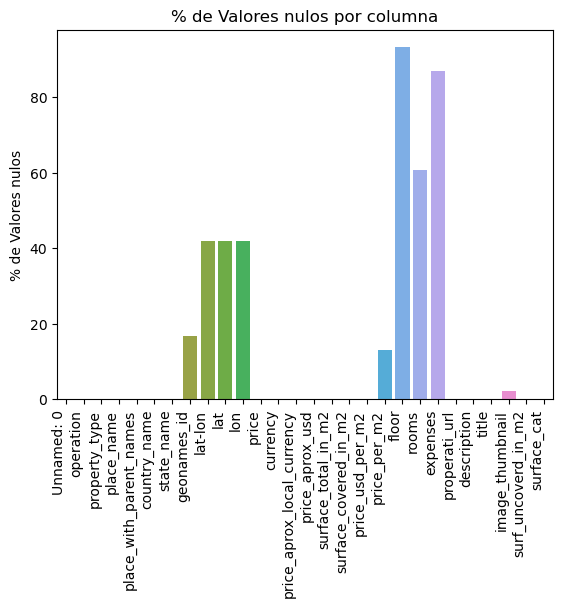

In [69]:
chart_fin = sns.barplot(data=df_prop_per_nulls_new, x=df_prop_per_nulls_new.index, y="percent")
chart_fin.set_xticklabels(chart_fin.get_xticklabels(), rotation=90, horizontalalignment='right')
chart_fin.set_ylabel("% de Valores nulos")
chart_fin.set_title("% de Valores nulos por columna")

Text(0.5, 1.0, '% de Valores nulos por columna Inicial vs Final')

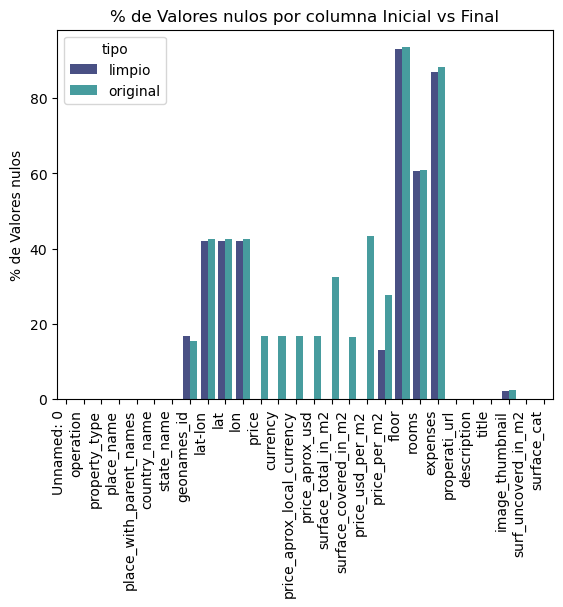

In [70]:
chart_ult = sns.barplot(data=df_prop_nulls_chart, x=df_prop_nulls_chart.index, y="percent", hue="tipo", palette="mako")
chart_ult.set_xticklabels(chart_ult.get_xticklabels(), rotation=90, horizontalalignment='right')
chart_ult.set_ylabel("% de Valores nulos")
chart_ult.set_title("% de Valores nulos por columna Inicial vs Final")

## Conclusión

Podemos ver un importante cambio en la imputación de valores en los precios de los imuebles antes y despues de la limpieza de datos. Donde se incluyen valores categorizados por tamaño, tipo y localización del inmueble, generando una diversidad de datos un poco más específicos.